In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [113]:
input_data = df[['Mileage']]
output_data = df['Price']

In [114]:
regr1 = linear_model.LinearRegression()

In [115]:
regr1.fit(input_data,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
regr1.score(input_data,output_data)

0.020463447323489481

In [129]:
model = Pipeline([('Poly',PolynomialFeatures(degree=2)),('linear',linear_model.LinearRegression())])

In [130]:
model.fit(input_data,output_data)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [131]:
model.score(input_data,output_data)

0.024681252371626994

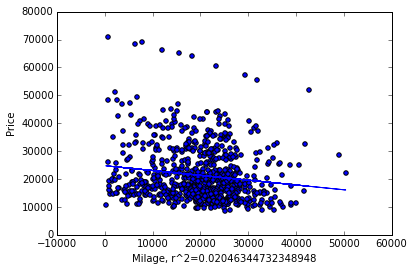

In [132]:
plt.scatter(input_data,output_data)
plt.xlabel('Milage, r^2={}'.format(regr1.score(input_data,output_data)))
plt.ylabel('Price')
plt.plot(input_data,regr1.predict(input_data))

In [133]:
def plot_regression(fn):
    # scatter plot first
    plt.scatter(input_data,output_data)
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    # fn is our (y = mx + b) expression
    plt.plot(xs, [fn(x) for x in xs])

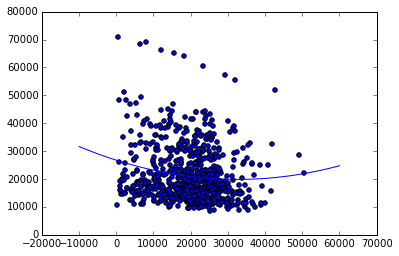

In [134]:
fn = lambda x: model.predict(x)[0]
plot_regression(fn)

In [26]:
clean = df.drop(['Make','Model','Trim','Type'],axis=1)

In [34]:
clean = clean.drop('Price',axis=1)

In [156]:
input_data = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
output_data = df['Price']

In [29]:
regr2 = linear_model.LinearRegression()

In [30]:
regr2.fit(input_data,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regr2.score(input_data,output_data)

0.4462643536728379

In [163]:
regr3 = linear_model.LinearRegression()

In [164]:
combos = [list(itertools.combinations(clean.columns,x)) for x in range(1,8)]

In [165]:
combo_list = []
for perm in combos:
    for combo in perm:
        combo_list.append(list(combo))

In [166]:
count = 0
r = [0]
index = []
while count < len(combo_list):
    regr3.fit(df[combo_list[count]],output_data)
    if regr3.score(df[combo_list[count]],output_data) > r[-1]:
        r.append(regr3.score(df[combo_list[count]],output_data))
        index.append(combo_list[count])
    count += 1
print(r)
print(index)

[0, 0.020463447323489481, 0.32385903759512258, 0.33982070826367505, 0.34346053658303799, 0.38394913240273443, 0.40237458603160192, 0.40380272693971553, 0.41914964510731778, 0.42250742147747633, 0.4225307670398466, 0.42409748258510394, 0.4369402151237245, 0.43780574153663798, 0.44569092105870245, 0.4462643536728379]
[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Cylinder', 'Doors'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]


In [167]:
regr3.fit(df[['Cylinder']],output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
regr3.score(df[['Cylinder']],output_data)

0.32385903759512258

In [169]:
model = Pipeline([('Poly',PolynomialFeatures(degree=2)),('linear',linear_model.LinearRegression())])

In [170]:
model.fit(df[['Cylinder']],output_data)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [171]:
model.score(df[['Cylinder']],output_data)

0.4630343518084109

In [172]:
def plot_regression(fn):
    # scatter plot first
    plt.scatter(df[['Cylinder']],output_data)
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    # fn is our (y = mx + b) expression
    plt.plot(xs, [fn(x) for x in xs])

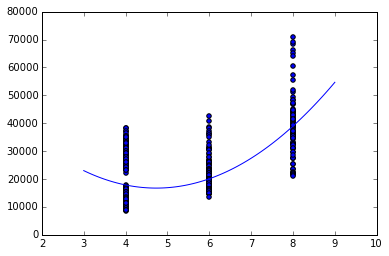

In [173]:
fn = lambda x: model.predict(x)[0]
plot_regression(fn)

# Part 2 Results 

* Looking at the data above it does not appear that our current data supports a strong corralation between any number of factors and price.
* The strongest single variable was Cylinder which got a r^2 of .32 when the entire data set only ever got to a r^2 of .45.  This suggests that it is the most predictive element, even if not terribly accurate. 
* Using polynomial regression we can increase the R^2 to a point but it seems best suited to data with more spread out points rather than static values.

In [174]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [215]:
for col in df.columns[2:6]:
    for thing in df[col].unique():
        df[thing] = [int(x == thing) for x in df[col]]

In [203]:
for thing in df.columns[2:6]:
    print(df[thing].unique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt' 'Corvette'
 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am' 'Grand Prix'
 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO' '9-2X AWD' 'Ion'
 'L Series']
['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'Hardtop Conv 2D' 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D'
 'LT Sedan 4D' 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD Sportwagon 4D' 'GT Sportwagon'
 'Sportwagon 4D' 'Linear Conv 2D' 'Linear Sedan 4D' 'Aero Conv 2D'
 'Aero 

In [210]:
df[df['Make'] == 'Buick']

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [216]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Arc Wagon 4D,Linear Wagon 4D,Aero Wagon 4D,Quad Coupe 2D,L300 Sedan 4D,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
